In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [48]:
# Generate Random Graph

rand_graph = nx.fast_gnp_random_graph(5, 0.5, directed=True)

for (u, v) in rand_graph.edges():
    rand_graph.edges[u, v]['weight'] = random.uniform(0, 1)

In [49]:
rand_graph.nodes

NodeView((0, 1, 2, 3, 4))

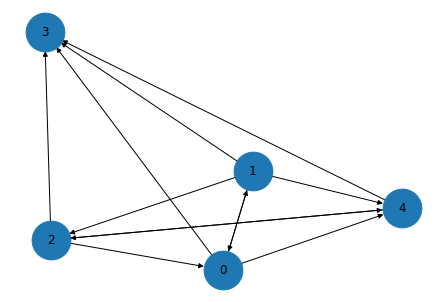

In [67]:
def draw_compat(g):
    plt.figure()
    pos = nx.spring_layout(g, scale = 1, weight=5, iterations=600)
    nx.draw(g, pos, node_size=1500)
    nx.draw_networkx_labels(g, pos)
    plt.savefig("graph.png", dpi=100)
    


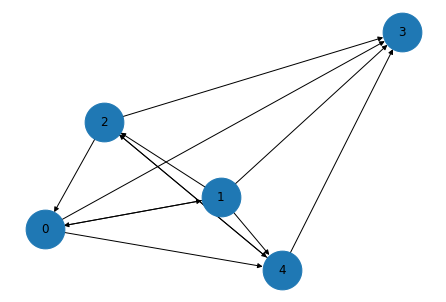

In [68]:
rand_graph[2][4]["color"] = "g"
rand_graph[4][2]["color"] = "g"
rand_graph[1][0]["color"] = "g"
rand_graph[0][1]["color"] = "g"
draw_compat(rand_graph)

In [59]:
cycles = list(nx.simple_cycles(rand_graph))

# for c in cycles:
#     print(c)


In [52]:
len(cycles)

5

In [53]:
def reduce_cycles(graph, maxk = 4):
    G = nx.DiGraph()
    cycles = list(nx.simple_cycles(rand_graph))
    
    for i, c in enumerate(cycles):
        if len(c) <= maxk:
            G.add_node(i)
            print(c)
            
            # Sum up the weights of each edge in the cycle
            cycle_weight = 0
            for j in range(len(c) - 1):
                cycle_weight += graph[c[j]][c[j+1]]["weight"]
            cycle_weight += graph[c[len(c) - 1]][c[0]]["weight"]
            
            G.nodes[i]['weight'] = round(cycle_weight, 2)
            G.nodes[i]['members'] = c.copy()
    for u in G.nodes:
        for v in G.nodes:
            if u is not v and set(cycles[u]) & set(cycles[v]):
                G.add_edge(u, v)
    return G


In [54]:
c_graph = reduce_cycles(rand_graph)
print(len(c_graph))

[0, 4, 2]
[0, 1, 4, 2]
[0, 1, 2]
[0, 1]
[2, 4]
5


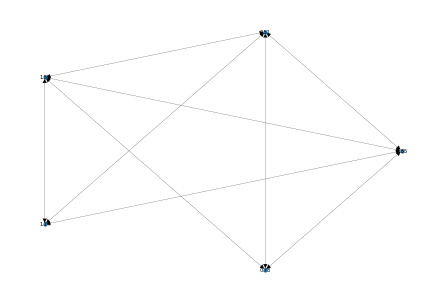

In [55]:
def draw_reduced(g):
    plt.figure()
    cpos = nx.circular_layout(g)
    nx.draw(g, cpos, node_size=10, width = 0.1)
    node_lables = nx.get_node_attributes(g, "weight")
    nx.draw_networkx_labels(g, cpos, node_lables, font_size=5)
    plt.savefig("graph.png", dpi=1000)
    
draw_reduced(c_graph)